In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from netgraph import Graph

# Undirected Graphs

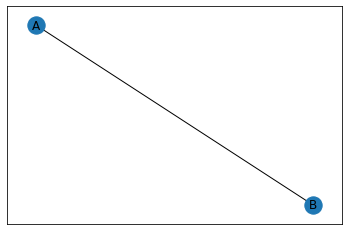

In [16]:
G = nx.Graph()
G.add_edge('A', 'B')

# G.pos = nx.spring_layout(G)

nx.draw_networkx(G)

In [17]:
G.nodes() # automatically added

NodeView(('A', 'B'))

In [18]:
G.edges()

EdgeView([('A', 'B')])

In [19]:
list(G.edges())

[('A', 'B')]

## Adding edges weight

In [20]:
G.add_edge('A', 'B', weight=6)
G.edges()

EdgeView([('A', 'B')])

In [21]:
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6})])

In [22]:
G.edges['A', 'B']

{'weight': 6}

In [23]:
G.edges['B', 'A']

{'weight': 6}

In [50]:
G['A']

AtlasView({'B': {'weight': 6}})

## Adding edge attributes

In [24]:
G.add_edge('B', 'C', relation='bridge')
G.edges()

EdgeView([('A', 'B'), ('B', 'C')])

In [25]:
G.edges['B', 'C']

{'relation': 'bridge'}

In [57]:
G.add_node('A', role="President")

In [58]:
G.nodes(data=True)

NodeDataView({'A': {'role': 'President'}, 'B': {}, 'C': {}})

In [60]:
G['A']

AtlasView({'B': {'weight': 6}})

## Visualize weights and attributes

/tmp/ipykernel_1253853/4012028106.py:9: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])


{('A', 'B'): Text(0.07022571478609471, 0.4707637722456877, '9th Avenue'),
 ('B', 'C'): Text(-0.07458702674044534, -0.4999999999999999, '10th Avenue')}

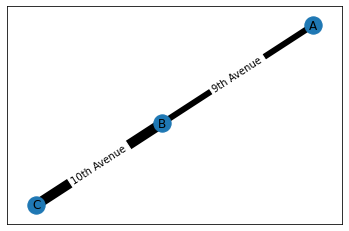

In [34]:
G = nx.Graph()
G.add_edge('A', 'B', weight=6, relation='9th Avenue')
G.add_edge('B', 'C', weight=10, relation='10th Avenue')

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])

labels = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [35]:
net = Network('700px', '700px', notebook=True)

In [36]:
edges_length = {(a, b): w/10 for a, b, w in G.edges(data='weight')}
edges_length

{('A', 'B'): 0.6, ('B', 'C'): 1.0}

### Visualizing Distance (with netgraph)

/home/ismail/anaconda3/lib/python3.9/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


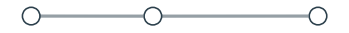

In [37]:
net.from_nx(G)
fig, ax = plt.subplots()

Graph(list(edges_length.keys()), node_layout='geometric', node_layout_kwargs=dict(edge_length=edges_length), ax=ax)
ax.set_aspect('equal')
plt.show()

## Directed Graphs

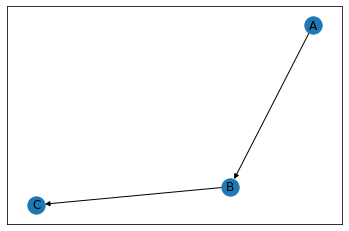

In [40]:
D = nx.DiGraph()
D.add_edge('A', 'B')
D.add_edge('B', 'C')

nx.draw_networkx(D)

In [34]:
('A', 'B') in D.edges()

True

In [35]:
('B', 'A') in D.edges()

False

In [36]:
D.edges()

OutEdgeView([('A', 'B'), ('B', 'C')])

# Multigraphs

Multigraphs are graphs that can have multiple edges between the same nodes

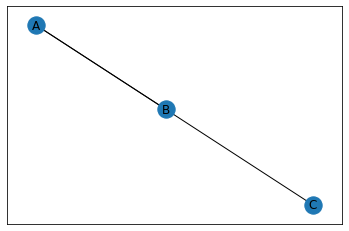

In [54]:
M = nx.MultiGraph()
M.add_edge('A', 'B', relation="family", weight=6)
M.add_edge('B', 'A', relation="family", weight=8)
M.add_edge('C', 'B', relation="family", weight=10)

pos = nx.spring_layout(M)
nx.draw_networkx(M, pos)

# labels = nx.get_edge_attributes(M,'weight')
# nx.draw_networkx_edge_labels(M, pos, edge_labels=labels)
# !! draw_networkx_edge_labels does not support multiedges. !!

In [48]:
# listing all edges between A and B
M['A']['B']

AtlasView({0: {'relation': 'family', 'weight': 6}, 1: {'relation': 'family', 'weight': 8}})

In [52]:
M['A']['B'][0]['weight'] = 5
M['A']['B'][0]['weight']

5

### Directed Multigraph

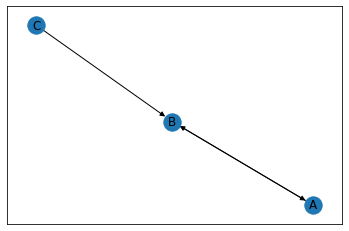

In [56]:
DM = nx.MultiDiGraph()
DM.add_edge('A', 'B', relation="family", weight=6)
DM.add_edge('B', 'A', relation="family", weight=8)
DM.add_edge('C', 'B', relation="family", weight=10)

pos = nx.spring_layout(DM)
nx.draw_networkx(DM, pos)
